In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm

In [2]:
from google.colab import files
uploaded = files.upload()

Saving delivery_time.csv to delivery_time.csv


In [3]:
dt = pd.read_csv('delivery_time.csv')
dt.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


#Performing EDA

In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
dt.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [6]:
dt.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [7]:
dt[dt.duplicated()].shape

(0, 2)

# Plotting the Data

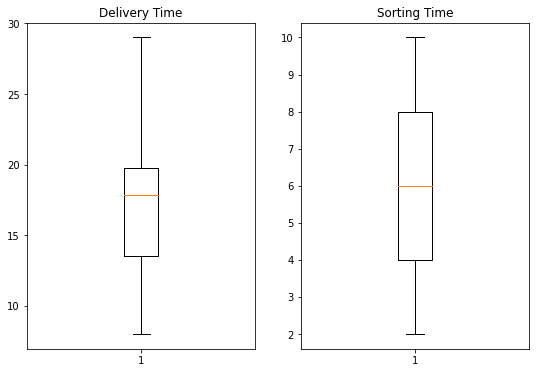

In [8]:

plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(dt['Delivery Time'])
plt.title('Delivery Time')
plt.subplot(122)
plt.boxplot(dt['Sorting Time'])
plt.title('Sorting Time')
plt.show()

Hence there are no outliers.

#Check Correlation between variables

In [9]:
dt.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


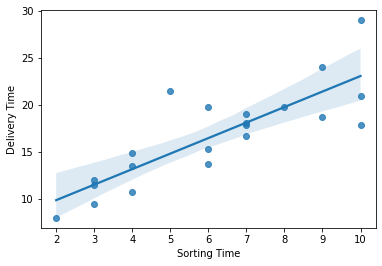

In [10]:
sns.regplot(dt['Sorting Time'],dt['Delivery Time'])  
plt.show()

Hence there is good correlation between the two variable and score is 0.825997.

#Checking for scedasticity

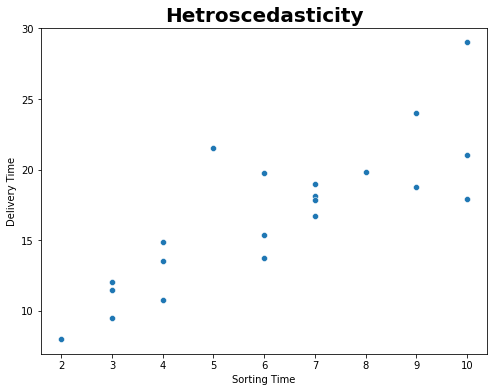

In [11]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = dt['Sorting Time'], y = dt['Delivery Time'])
plt.title('Hetroscedasticity', fontweight = 'bold', fontsize = 20)
plt.show()

In [12]:
dt.var()

Delivery Time    25.754619
Sorting Time      6.461905
dtype: float64

Hence we can see as the Sorting Time increases, Delivery Time also increases with much variation.
The plotted data doesn't have any specific pattern and we can consider it as Heteroscedasticity.

#Building the model and applying Transformations 

In [15]:
dt.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [17]:
dt1 = dt.rename(columns={'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'})
dt1.columns

Index(['Delivery_Time', 'Sorting_Time'], dtype='object')

In [18]:
model = sm.ols('Delivery_Time~Sorting_Time', data = dt1).fit()

In [19]:
# Finding R_squared and Accuracy
model.rsquared, model.rsquared_adj, model.aic

(0.6822714748417231, 0.6655489208860244, 106.71400170798609)

As we can see our raw data model has R_squared and R_squared_adjusted scores are below par. So we ally Transformations.

**1) Square Root transformation**

In [22]:
model_sqrt = sm.ols('np.sqrt(Delivery_Time)~np.sqrt(Sorting_Time)', data = dt1).fit()

In [23]:
# Finding R_squared and Accuracy
model_sqrt.rsquared, model_sqrt.rsquared_adj, model_sqrt.aic

(0.7292011987544664, 0.7149486302678594, 15.463994487107719)

**2) Cube Root transformation**

In [20]:
model_cbrt = sm.ols('np.cbrt(Delivery_Time)~np.cbrt(Sorting_Time)', data = dt1).fit()

In [21]:
# Finding R_squared and Accuracy
model_cbrt.rsquared, model_cbrt.rsquared_adj, model_cbrt.aic

(0.7441167577566266, 0.7306492186911859, -22.070950675427)

**3) Log transformation**

In [25]:
model_log = sm.ols('np.log(Delivery_Time)~np.log(Sorting_Time)', data = dt1).fit()

In [26]:
# Finding R_squared and Accuracy
model_log.rsquared, model_log.rsquared_adj, model_log.aic

(0.77216134926874, 0.7601698413355158, -16.58128395971123)

Lets analyze Root Mean Squared Error (RMSE) between the model’s predicted target value and the actual target value.

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
square_root_pred_y =np.square(model_sqrt.predict(dt1['Sorting_Time']))
cube_root_pred_y =pow(model_cbrt.predict(dt1['Sorting_Time']),3)
log_model_pred_y =np.exp(model_log.predict(dt1['Sorting_Time']))

In [29]:
rmse_sqrt =np.sqrt(mean_squared_error(dt1['Delivery_Time'], square_root_pred_y))
rmse_cbrt =np.sqrt(mean_squared_error(dt1['Delivery_Time'], cube_root_pred_y))
rmse_log =np.sqrt(mean_squared_error(dt1['Delivery_Time'], log_model_pred_y))

In [30]:
pred_y = model_sqrt.predict(dt1['Sorting_Time'])
rmse_raw = np.sqrt(mean_squared_error(dt1['Delivery_Time'], pred_y))

#Table containing R_squared, RMSE & Accuracy values

In [31]:
models = {'Different_Models':['Raw data', 'Square Root Transformed Model', 'Cube Root Transformed Model', 'Log Transformed Model'],
        'R_squared':[model.rsquared,model_sqrt.rsquared,model_cbrt.rsquared,model_log.rsquared],
        'R_squared_adjusted':[model.rsquared_adj,model_sqrt.rsquared_adj,model_cbrt.rsquared_adj,model_log.rsquared_adj],
        'RMSE':[rmse_raw,rmse_sqrt,rmse_cbrt,rmse_log],
       'Accuracy':[model.aic,model_sqrt.aic,model_cbrt.aic,model_log.aic]}
model_table = pd.DataFrame(models)
model_table

,Different_Models,R_squared,R_squared_adjusted,RMSE,Accuracy
0,Raw data,0.682271,0.665549,13.519392,106.714002
1,Square Root Transformed Model,0.729201,0.714949,2.762294,15.463994
2,Cube Root Transformed Model,0.744117,0.730649,2.755584,-22.070951
3,Log Transformed Model,0.772161,0.760170,2.745829,-16.581284


As log transformed model has the minimum RMSE and highest R-squared score, we shall use this for prediction.

In [32]:
predicted = pd.DataFrame()
predicted['Sorting_Time'] = dt1.Sorting_Time
predicted['Delivery_Time'] = dt1.Delivery_Time
predicted['Predicted_Delivery_Time'] = pd.DataFrame(np.exp(model_log.predict(predicted.Sorting_Time)))
predicted

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,22.597360
1,4,13.50,13.070123
2,6,19.75,16.653216
3,9,24.00,21.218593
4,10,29.00,22.597360
5,6,15.35,16.653216
6,7,19.00,18.259981
7,3,9.50,11.005911
8,10,17.90,22.597360
9,9,18.75,21.218593


In [33]:
# Now lets predict for our Raw data

predicted1 = pd.DataFrame()
predicted1['Sorting_Time'] = dt1.Sorting_Time
predicted1['Delivery_Time'] = dt1.Delivery_Time
predicted1['Predicted_Delivery_Time'] = pd.DataFrame(model.predict(predicted1.Sorting_Time))
predicted1

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913


**Hence, we conclude that Log Transformed model is much better.**